Creating RawArray with float64 data, n_channels=8, n_times=800
    Range : 0 ... 799 =      0.000 ...     6.392 secs
Ready.


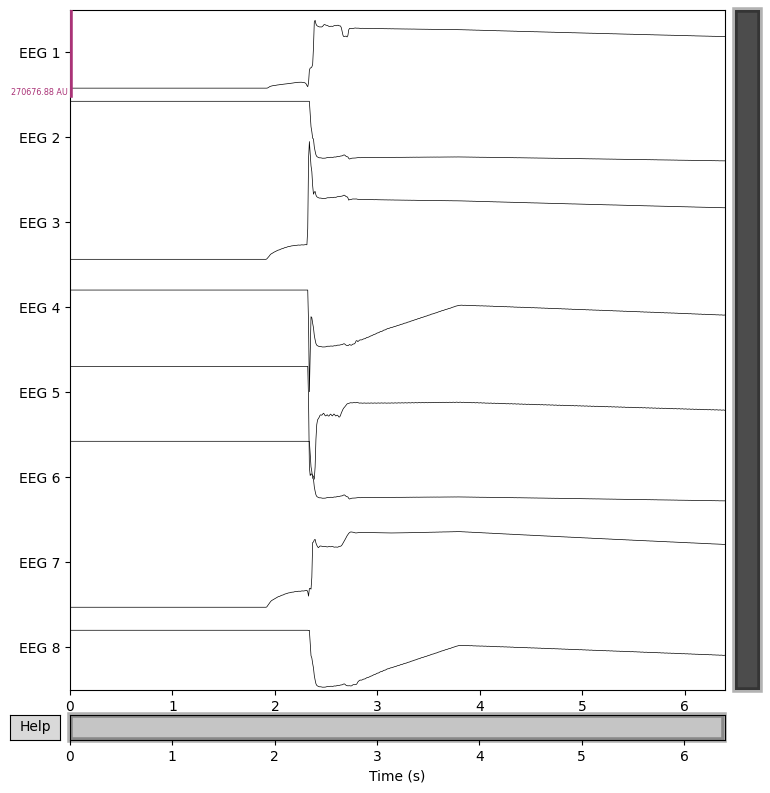

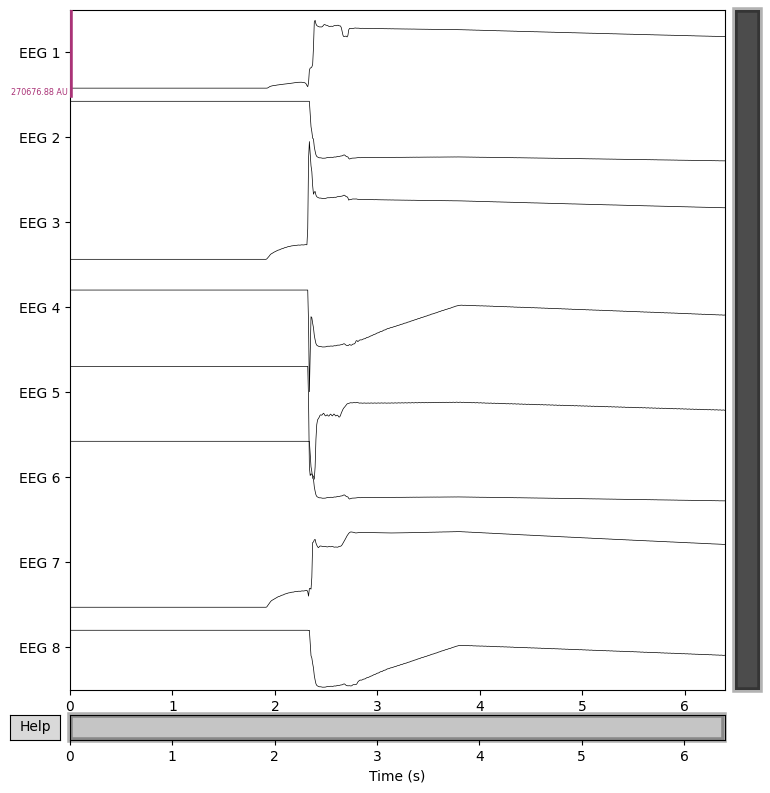

In [5]:
import pandas as pd
import numpy as np
import mne
from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter

eeg_chans =  BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value)

# read in the data
# backward_df = pd.read_csv('../data/gerhort_data/backward.csv', delimiter='\t')
# forward_df = pd.read_csv('../data/gerhort_data/forward.csv', delimiter='\t')
# left_df = pd.read_csv('../data/gerhort_data/left.csv', delimiter='\t')
# right_df = pd.read_csv('../data/gerhort_data/right.csv', delimiter='\t')
# rest_df = pd.read_csv('../data/gerhort_data/rest.csv', delimiter='\t')

backward_data = DataFilter.read_file('./test_data/kaleb_test0/headset_data/forward.csv')[:, 200:1000]
backward_data_eeg = backward_data[eeg_chans, :]
df = pd.DataFrame(np.transpose(backward_data_eeg))


# create a list of channel names
channel_names = []
for i in range(8):
    channel_names.append('EEG ' + str(i+1))

# extraxt data (only use 260 time points of data)
# data = backward_df.iloc[:, 0:].values

# create mne info object
info = mne.create_info(channel_names, sfreq=125, ch_types='misc')

# create mne raw object
raw = mne.io.RawArray(backward_data_eeg, info)

# plot the raw data
raw.plot()


Creating RawArray with float64 data, n_channels=16, n_times=250
    Range : 0 ... 249 =      0.000 ...     1.992 secs
Ready.


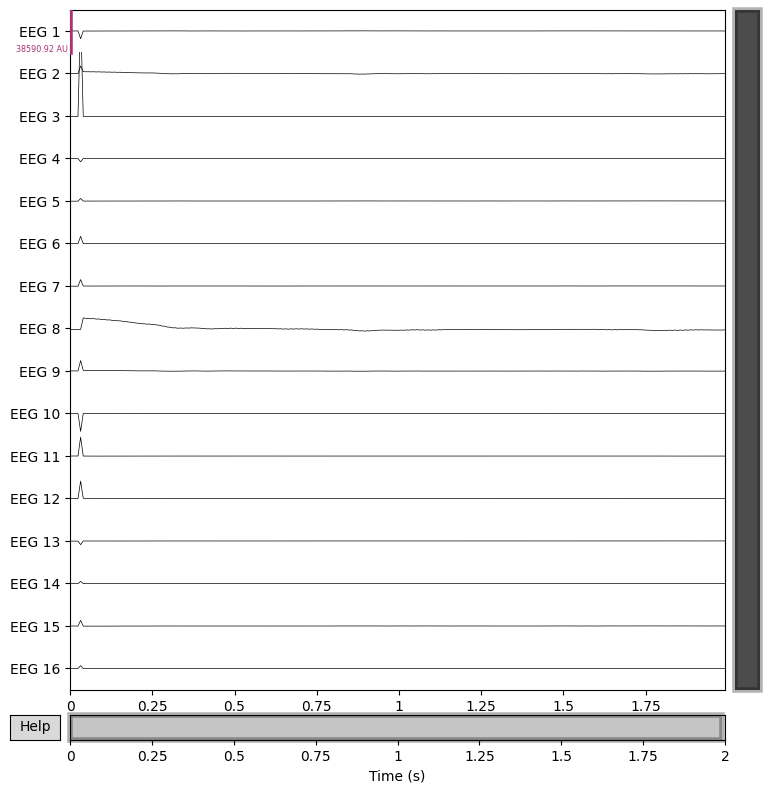

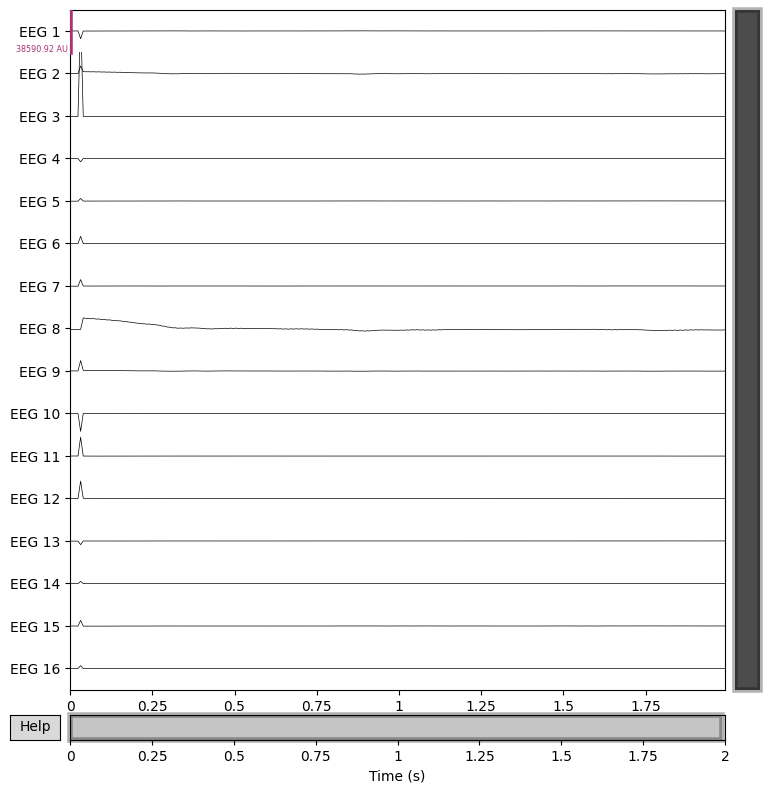

In [10]:
backward_data = DataFilter.read_file('./test_data/gerhort/headset_data/backward.csv')[:, 1250:1500]
backward_data_eeg = backward_data[eeg_chans, :]
df = pd.DataFrame(np.transpose(backward_data_eeg))


# create a list of channel names
channel_names = []
for i in range(16):
    channel_names.append('EEG ' + str(i+1))

# extraxt data (only use 260 time points of data)
# data = backward_df.iloc[:, 0:].values

# create mne info object
info = mne.create_info(channel_names, sfreq=125, ch_types='misc')

# create mne raw object
raw = mne.io.RawArray(backward_data_eeg, info)

# plot the raw data
raw.plot()


Creating RawArray with float64 data, n_channels=16, n_times=3703
    Range : 0 ... 3702 =      0.000 ...    29.616 secs
Ready.


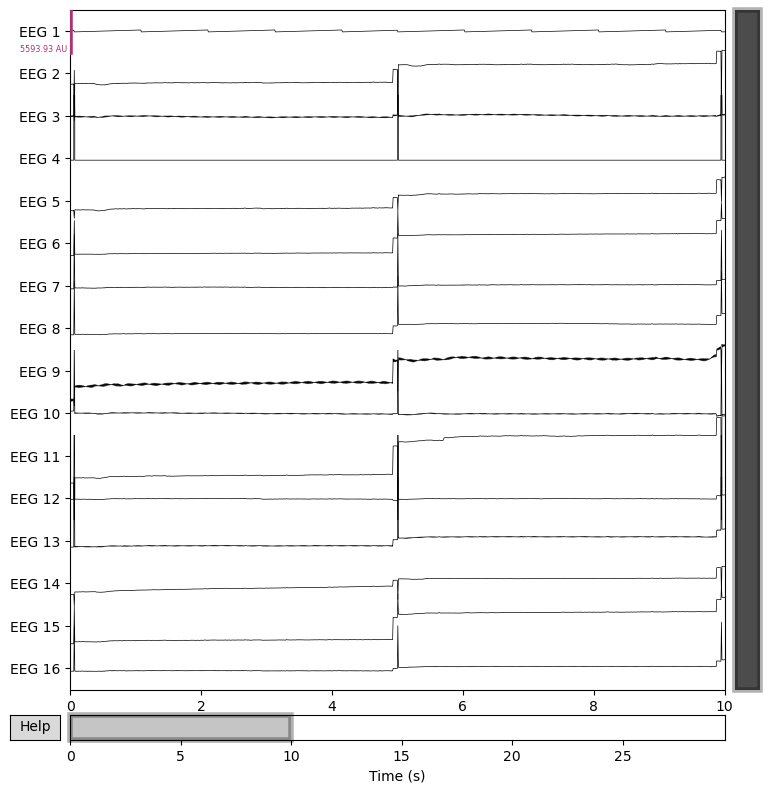

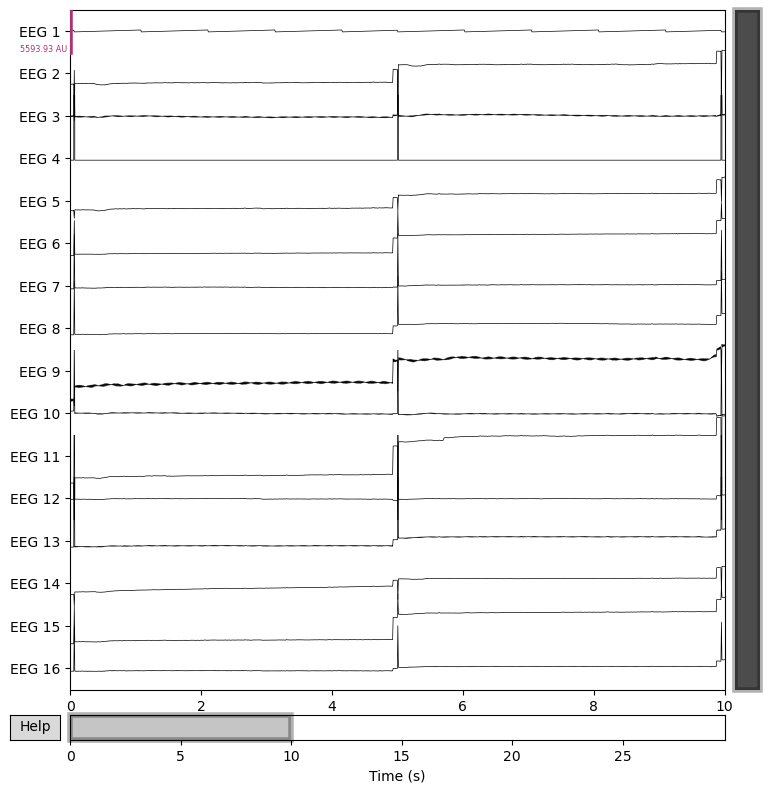

In [25]:
# do the same for the left data
data = left_df.iloc[:, 0:].values

# create mne info object
info = mne.create_info(channel_names, sfreq=125, ch_types='misc')


# create mne raw object
raw = mne.io.RawArray(data.T, info)

# plot the raw data
raw.plot()